GOALS: 
1. Analyze popularity of artists based on centralities
2. Find communities of similar artists that co-occur across playlists using Girvan-Newman and/or Louvain

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm

## Sample Comparison

In [2]:
g = nx.read_graphml("graphs/artists_graph_connected_30.graphml")
g
print(g)
print("Number of connected Components:",nx.number_connected_components(g))
print("Diameter:",nx.diameter(g))

Graph with 743 nodes and 23508 edges
Number of connected Components: 1
Diameter: 5


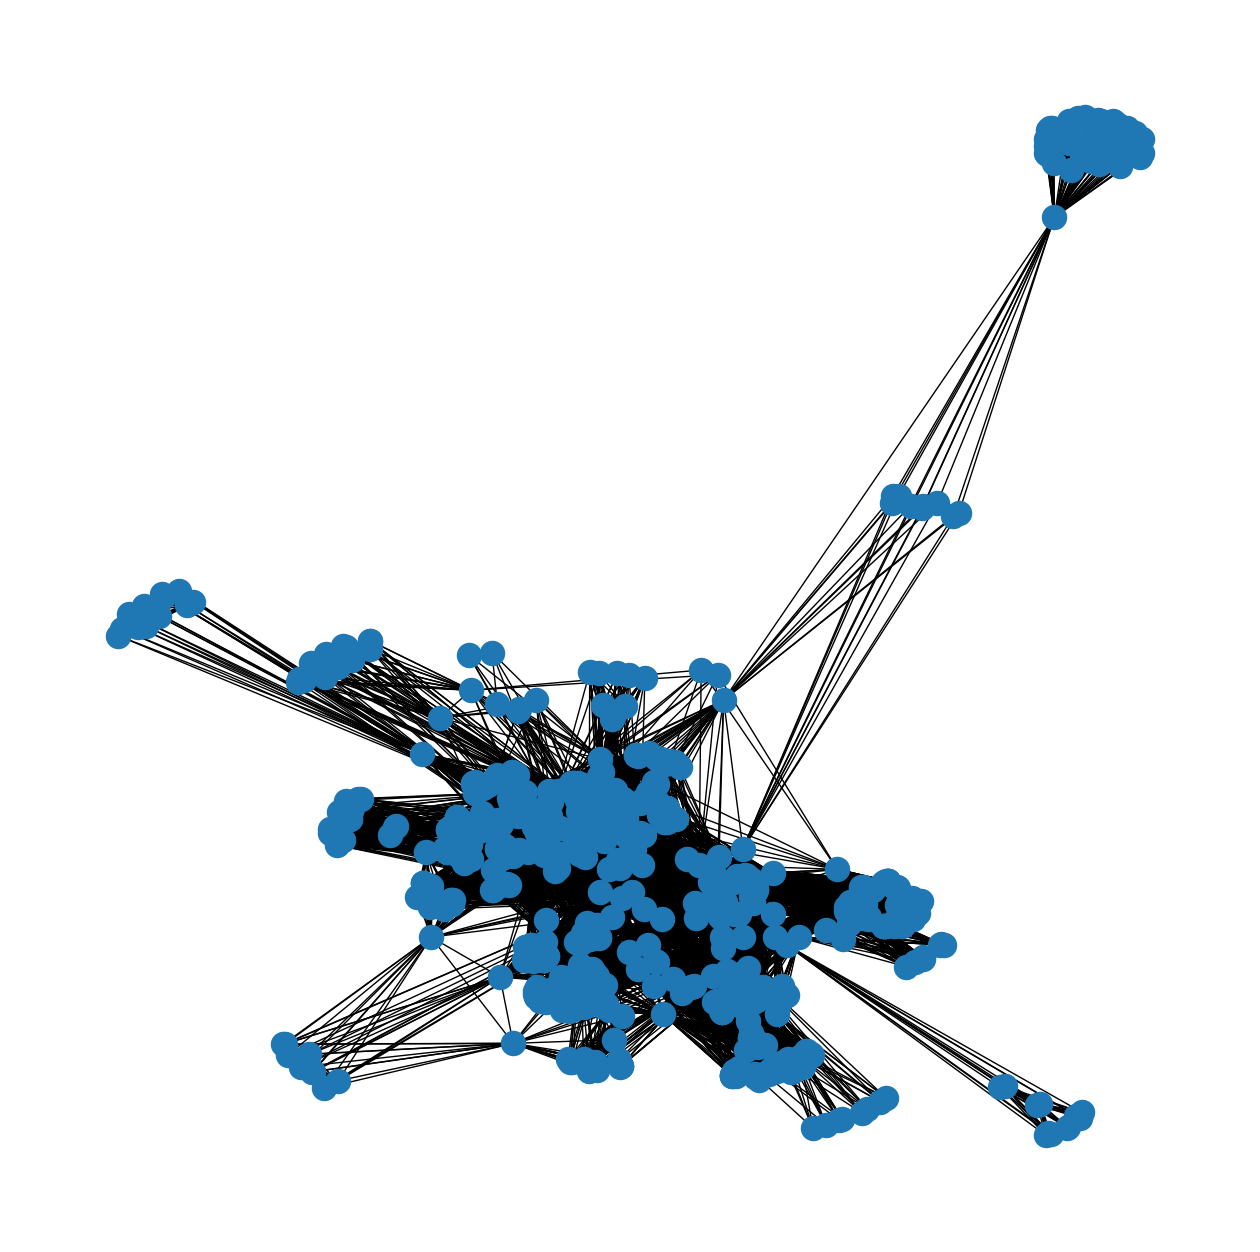

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(16,16))
nx.draw_networkx(g, ax=ax, with_labels=False)
plt.axis("off")
plt.show()

Graph with 1860 nodes and 82404 edges


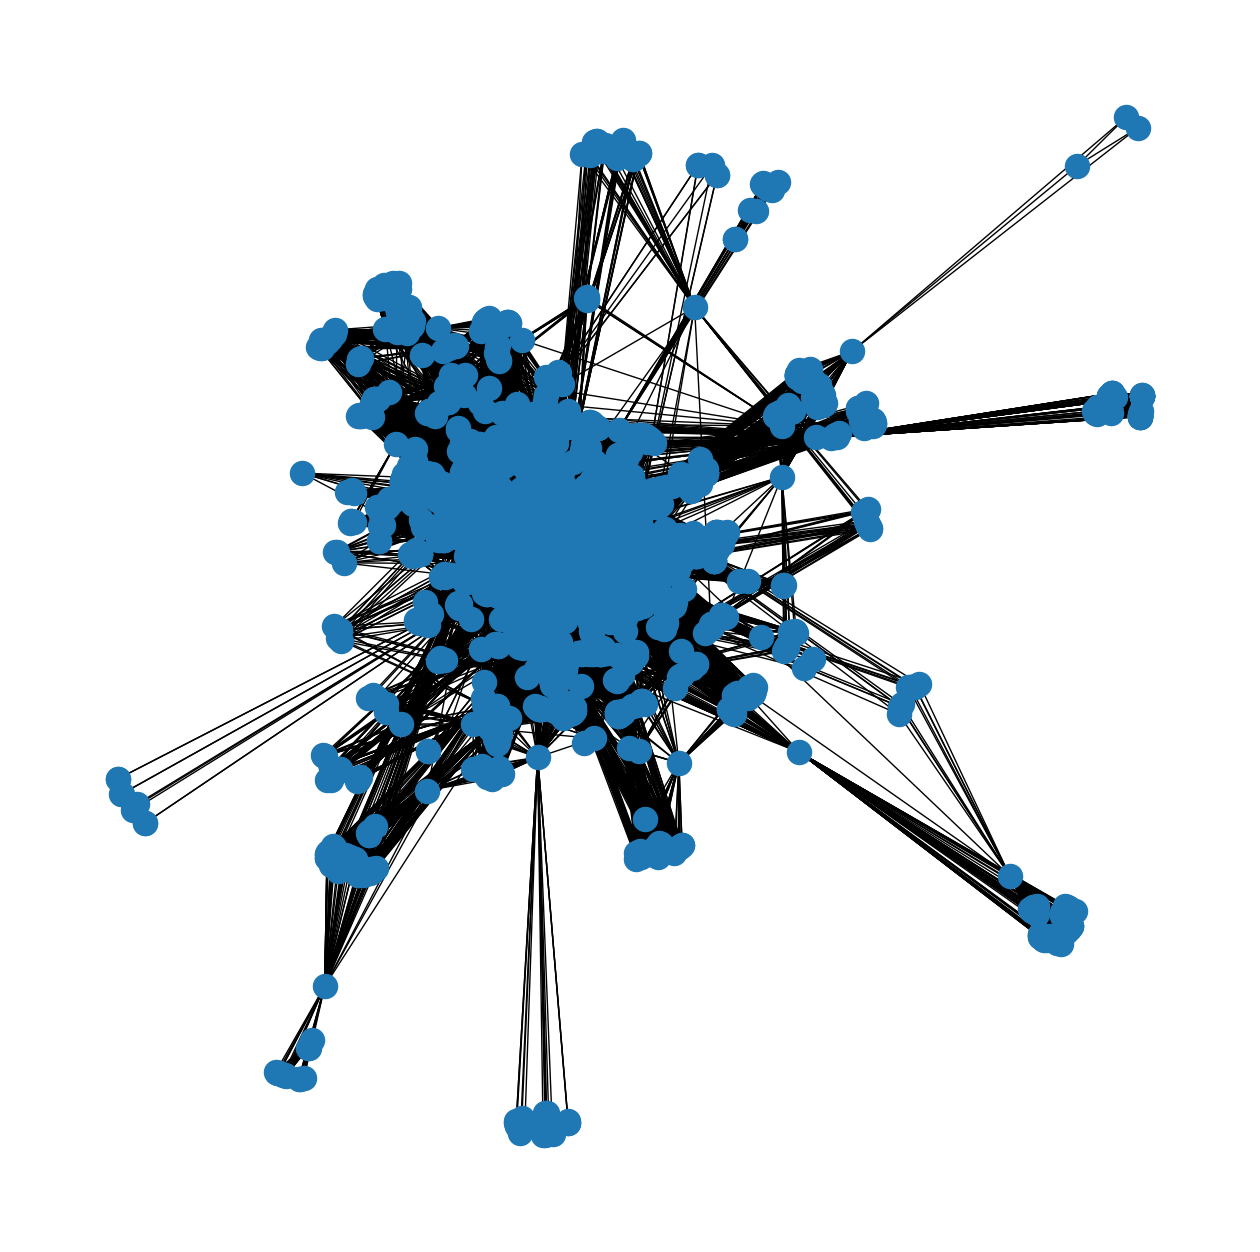

In [4]:
g100 = nx.read_graphml("graphs/artists_graph_connected_100.graphml")
print(g100)
fig, ax = plt.subplots(1, 1, figsize=(16,16))
nx.draw_networkx(g100, ax=ax, with_labels=False)
plt.axis("off")
plt.show()

In [6]:
g = nx.read_graphml("graphs/artists_graph_connected_30.graphml")

degree_centrality = nx.degree_centrality(g)
betweenness_centrality = nx.betweenness_centrality(g)
closeness_centrality = nx.closeness_centrality(g)
eigenvector_centrality = nx.eigenvector_centrality(g)

average_degree_centrality = np.mean(list(degree_centrality.values()))
average_betweenness_centrality = np.mean(list(betweenness_centrality.values()))
average_closeness_centrality = np.mean(list(closeness_centrality.values()))
average_eigenvector_centrality = np.mean(list(eigenvector_centrality.values()))

print(f"Average Degree Centrality: {average_degree_centrality:.4f}")
print(f"Average Betweenness Centrality: {average_betweenness_centrality:.4f}")
print(f"Average Closeness Centrality: {average_closeness_centrality:.4f}")
print(f"Average Eigenvector Centrality: {average_eigenvector_centrality:.4f}")

Average Degree Centrality: 0.0853
Average Betweenness Centrality: 0.0020
Average Closeness Centrality: 0.4150
Average Eigenvector Centrality: 0.0165


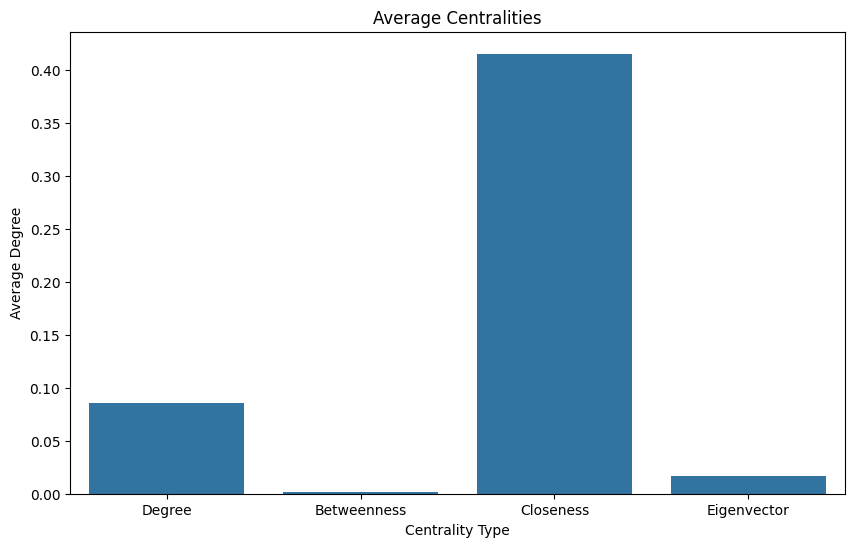

In [ ]:
# plt.figure(figsize=(10, 6))
# sns.barplot(x='Centrality', y='Average Value', data=centralities_df)
# plt.xlabel("Centrality Type")
# plt.ylabel("Average Centrality")
# plt.title("Average Centralities for sample size 30")
# plt.show()

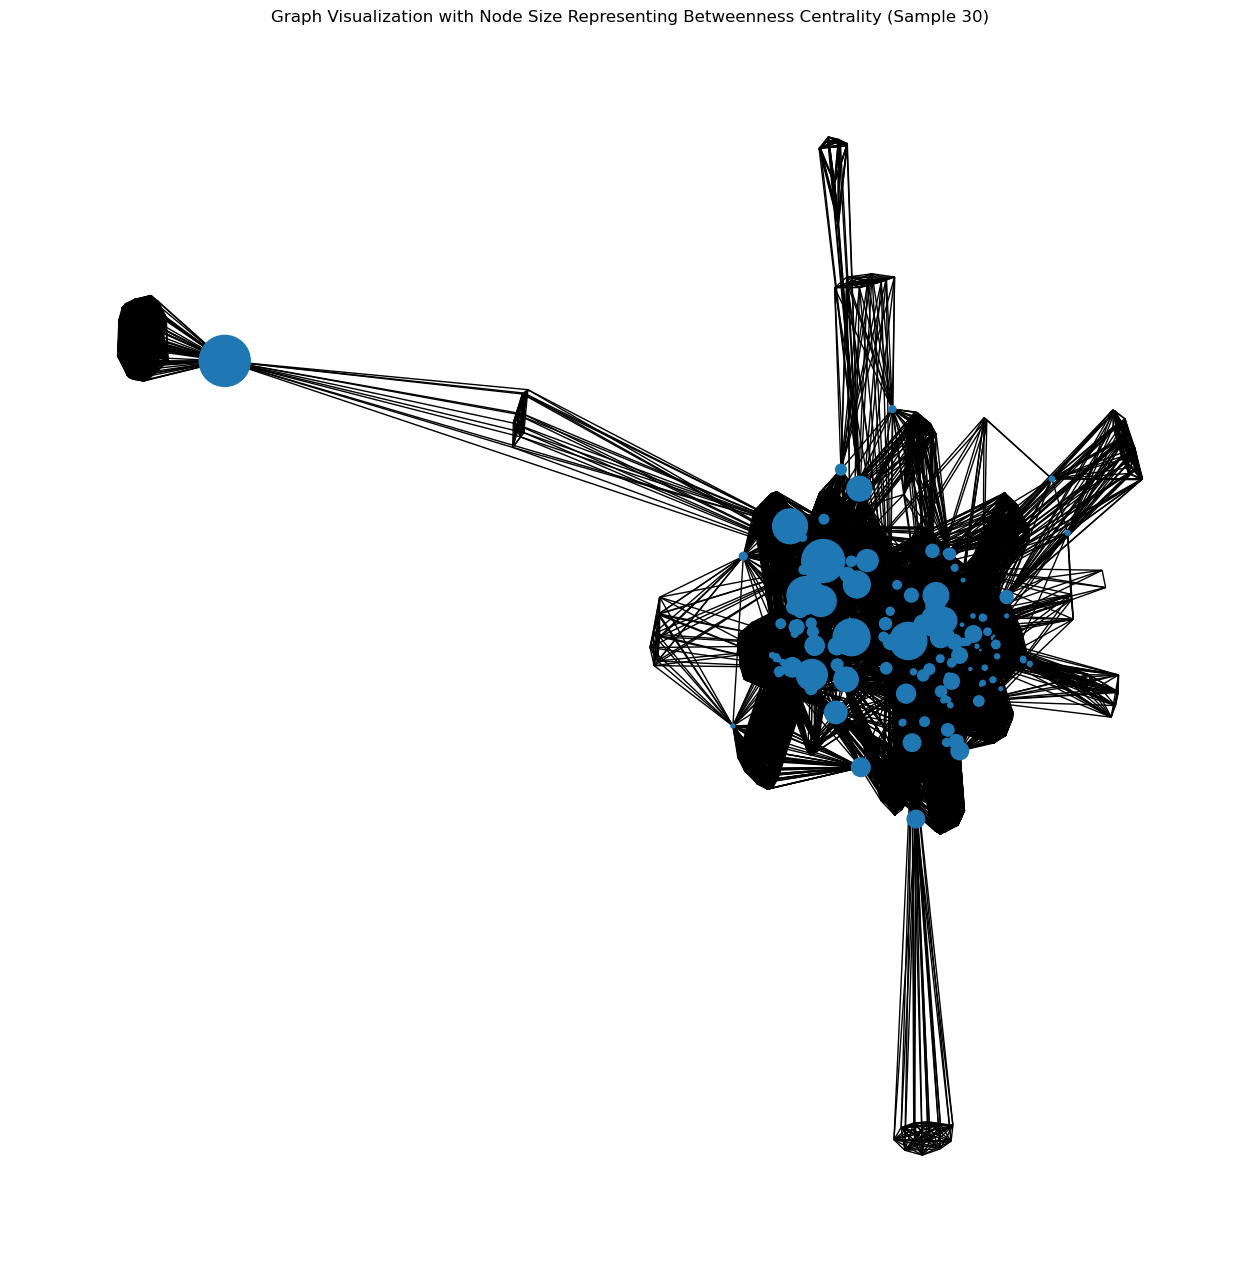

In [7]:
# Low betweeness, probably because of large data size and high closness/transience
fig, ax = plt.subplots(1, 1, figsize=(16,16))
node_size = [v * 10000 for v in betweenness_centrality.values()]
nx.draw_networkx(g, ax=ax, node_size=node_size, with_labels=False)
plt.axis("off")
plt.title("Graph Visualization with Node Size Representing Betweenness Centrality (Sample 30)")
plt.show()

In [8]:
g100 = nx.read_graphml("graphs/artists_graph_connected_100.graphml")

degree_centrality = nx.degree_centrality(g100)
betweenness_centrality = nx.betweenness_centrality(g100)
closeness_centrality = nx.closeness_centrality(g100)
eigenvector_centrality = nx.eigenvector_centrality(g100)

average_degree_centrality = np.mean(list(degree_centrality.values()))
average_betweenness_centrality = np.mean(list(betweenness_centrality.values()))
average_closeness_centrality = np.mean(list(closeness_centrality.values()))
average_eigenvector_centrality = np.mean(list(eigenvector_centrality.values()))

print(f"Average Degree Centrality: {average_degree_centrality:.4f}")
print(f"Average Betweenness Centrality: {average_betweenness_centrality:.4f}")
print(f"Average Closeness Centrality: {average_closeness_centrality:.4f}")
print(f"Average Eigenvector Centrality: {average_eigenvector_centrality:.4f}")

Average Degree Centrality: 0.0477
Average Betweenness Centrality: 0.0008
Average Closeness Centrality: 0.4115
Average Eigenvector Centrality: 0.0134


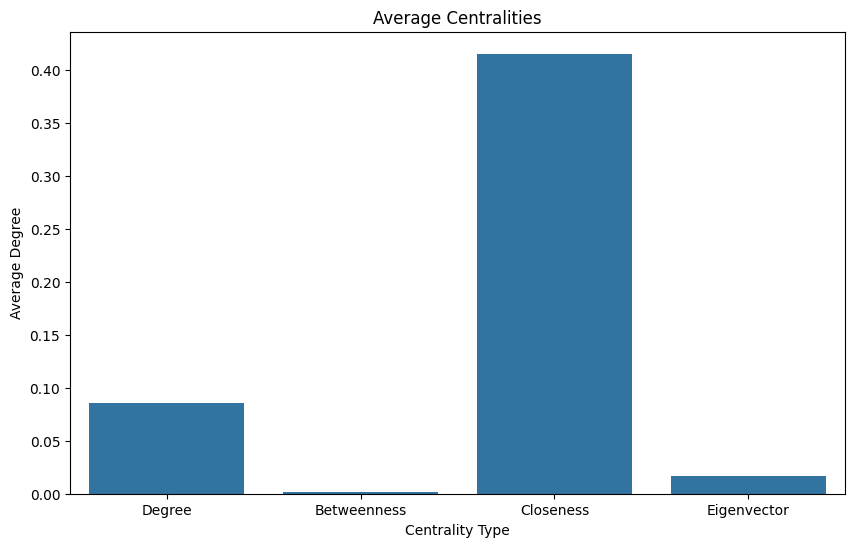

In [ ]:
# plt.figure(figsize=(10, 6))
# sns.barplot(x='Centrality', y='Average Value', data=centralities_df)
# plt.xlabel("Centrality Type")
# plt.ylabel("Average Centrality")
# plt.title("Average Centralities for sample size 100")
# plt.show()

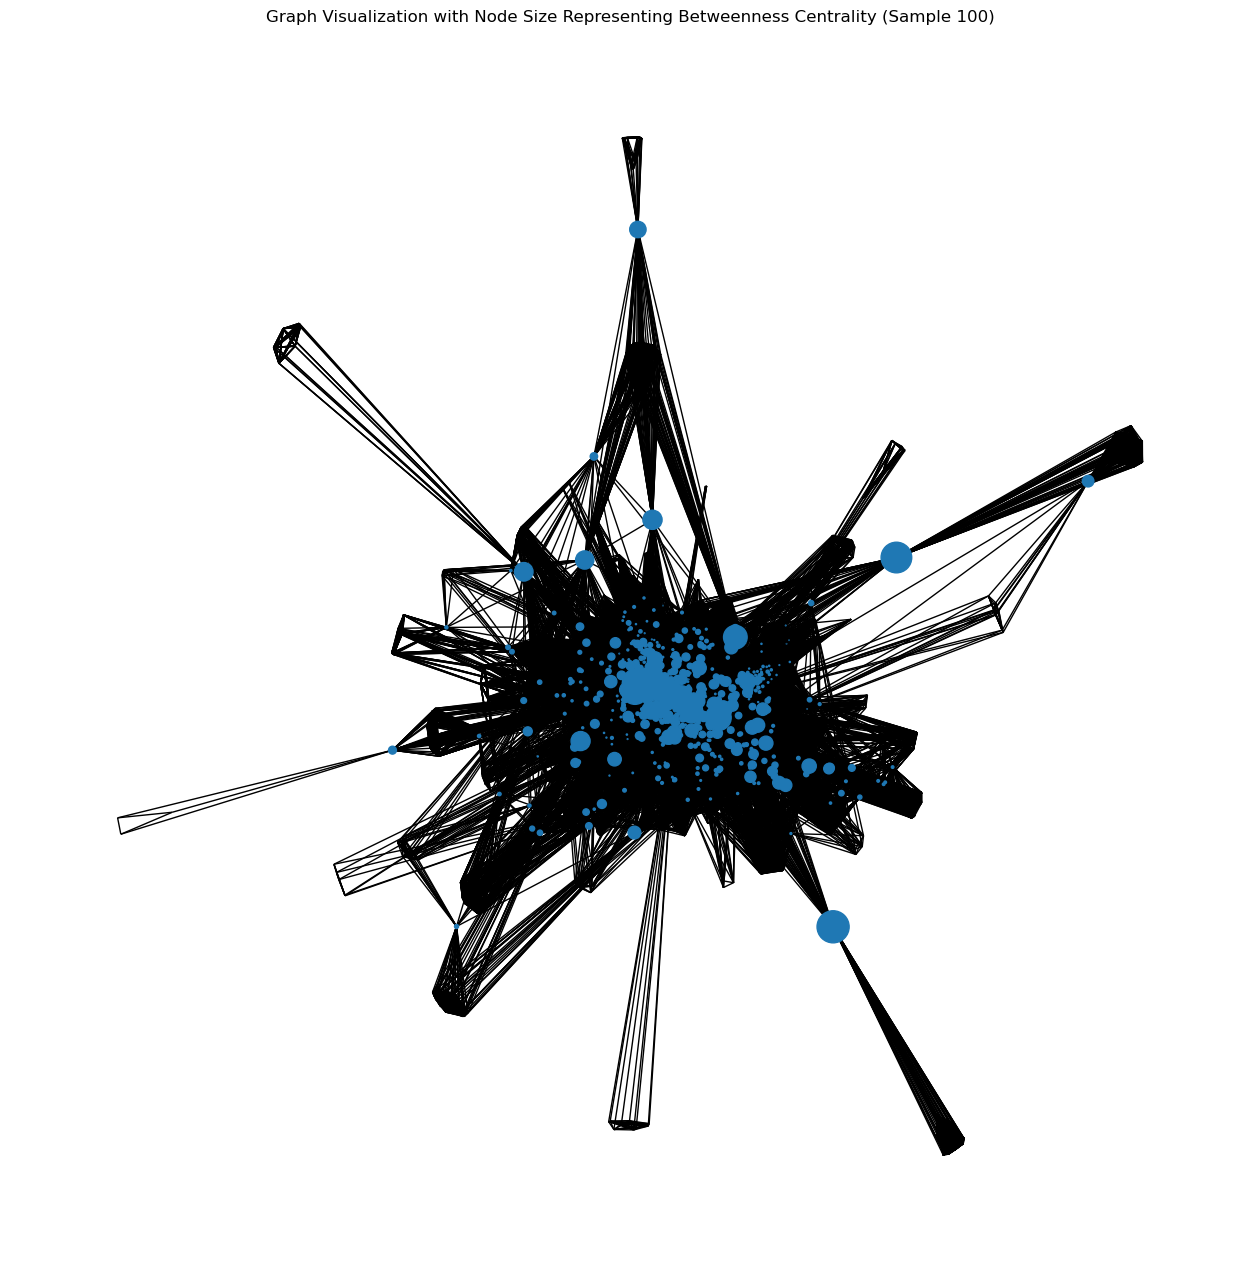

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(16,16))
node_size = [v * 10000 for v in betweenness_centrality.values()]
nx.draw_networkx(g100, ax=ax, node_size=node_size, with_labels=False)
plt.axis("off")
plt.title("Graph Visualization with Node Size Representing Betweenness Centrality (Sample 100)")
plt.show()

Comparing the two sample sizes, the 30 one is more manageable to work with, since the 100 one takes alot longer to load and perform calculations on. The averages and distribution of centralities of the 30 is similar to the 100, so we can assume that the 30 sample still accurately reflects the original data set.

In [10]:
degree_centrality = nx.degree_centrality(g)
degree_centrality

{'AC/DC': 0.0876010781671159,
 'Billy Joel': 0.192722371967655,
 "Guns N' Roses": 0.0876010781671159,
 'Disturbed': 0.0876010781671159,
 'Van Halen': 0.0876010781671159,
 'The Beatles': 0.10242587601078168,
 'Eminem': 0.30188679245283023,
 'Queen': 0.0876010781671159,
 'Lynyrd Skynyrd': 0.28706199460916443,
 'Beastie Boys': 0.0876010781671159,
 'Wu-Tang Clan': 0.10377358490566038,
 'N.W.A.': 0.16711590296495957,
 'Aerosmith': 0.0876010781671159,
 'Poison': 0.0876010781671159,
 'Mötley Crüe': 0.0876010781671159,
 'Twisted Sister': 0.0876010781671159,
 'Def Leppard': 0.0876010781671159,
 'Run–D.M.C.': 0.0876010781671159,
 'The Beach Boys': 0.22641509433962265,
 'Kansas': 0.0876010781671159,
 'Alice Cooper': 0.0876010781671159,
 'Billy Idol': 0.0876010781671159,
 'Cheap Trick': 0.0876010781671159,
 'Creedence Clearwater Revival': 0.0876010781671159,
 'Misfits': 0.0876010781671159,
 'OutKast': 0.2129380053908356,
 'The Monkees': 0.0876010781671159,
 'America': 0.0876010781671159,
 'Elton J

## Centrality Analysis (Unweighted)

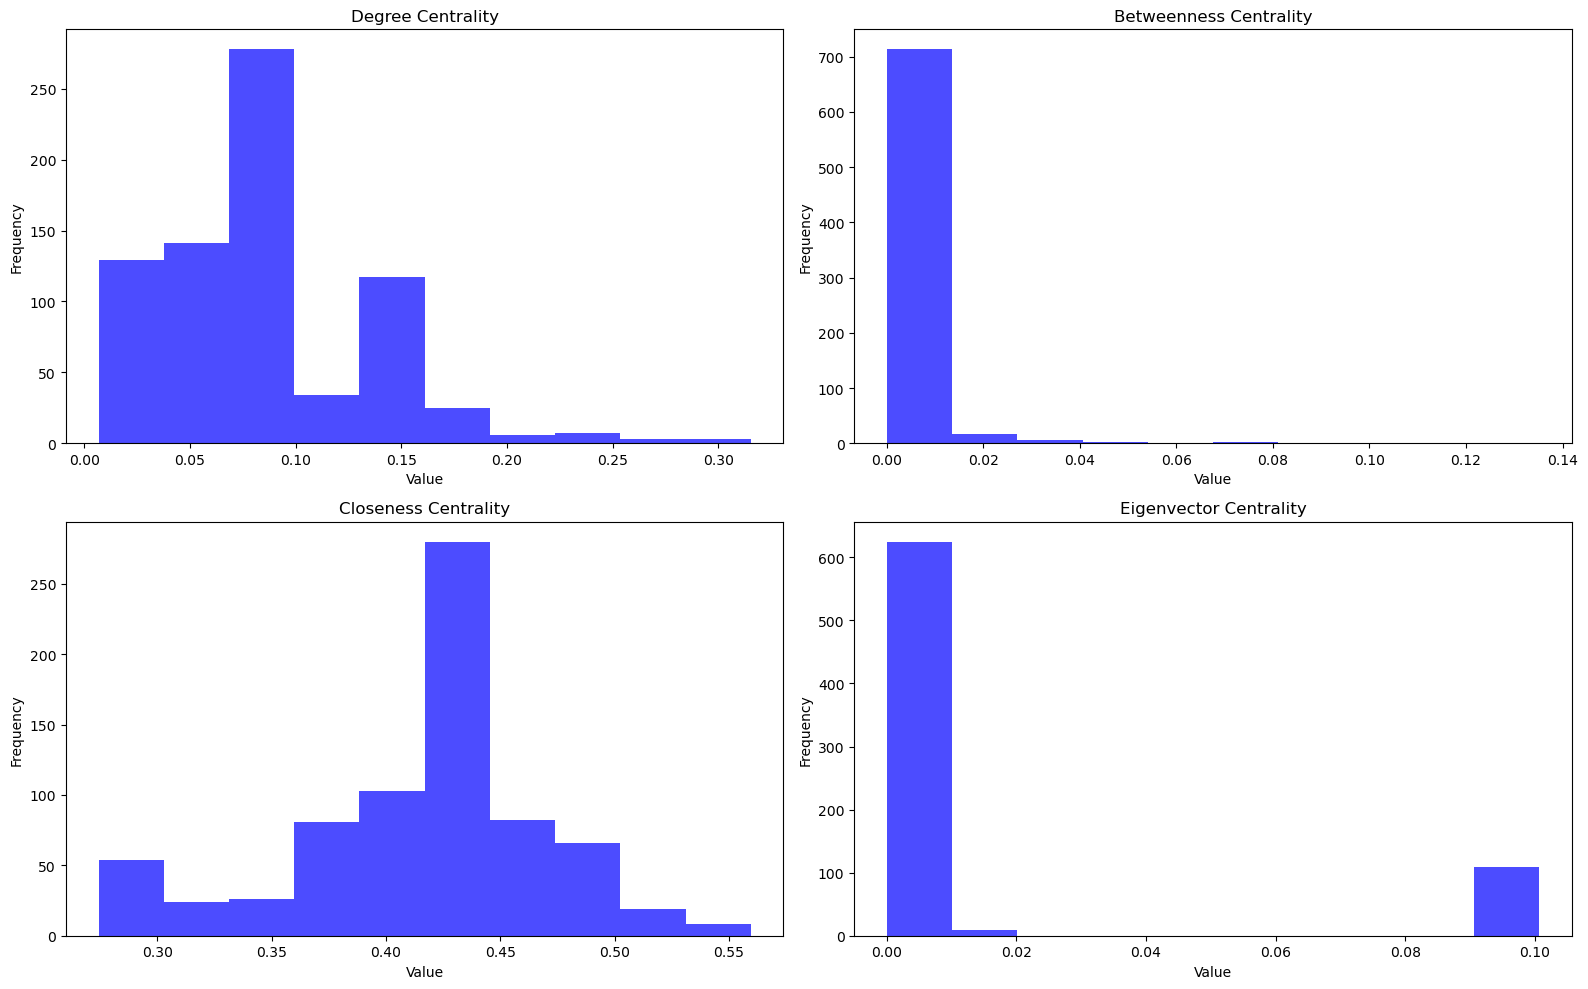

In [60]:
degree_centrality = nx.degree_centrality(g)
betweenness_centrality = nx.betweenness_centrality(g)
closeness_centrality = nx.closeness_centrality(g)
eigenvector_centrality = nx.eigenvector_centrality(g)

centrality_measures = {
    'Degree Centrality': list(degree_centrality.values()),
    'Betweenness Centrality': list(betweenness_centrality.values()),
    'Closeness Centrality': list(closeness_centrality.values()),
    'Eigenvector Centrality': list(eigenvector_centrality.values())
}


plt.figure(figsize=(16, 10))

for i, (title, values) in enumerate(centrality_measures.items(), 1):
    plt.subplot(2, 2, i)
    plt.hist(values, bins=10, alpha=0.7, color='blue')
    plt.title(title)
    plt.xlabel('Value')
    plt.ylabel('Frequency')


plt.tight_layout()
plt.show()

Comparison of Centrality Distributions

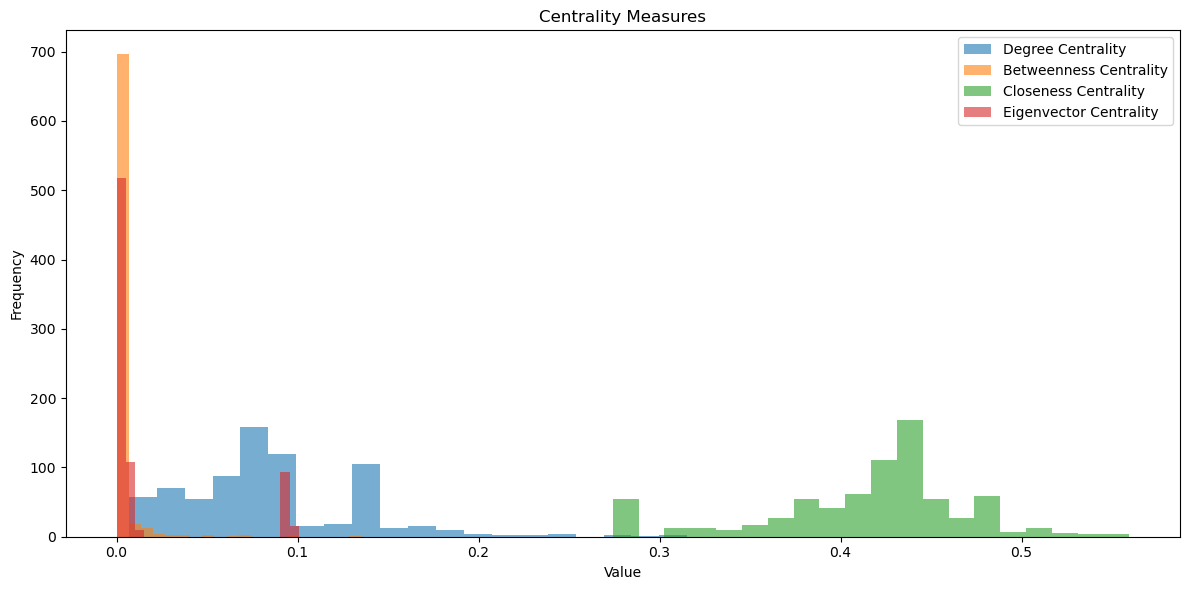

In [12]:
plt.figure(figsize=(12, 6))
for i, (title, values) in enumerate(centrality_measures.items(), 1):
    plt.hist(values, bins=20, alpha=0.6, label=title)

plt.title('Centrality Measures')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

## Centrality Analysis (Weighted)

In [13]:
weighted_degree_centrality = {node: degree for node, degree in g.degree(weight='weight')}
weighted_betweenness_centrality = nx.betweenness_centrality(g, weight='weight')
weighted_closeness_centrality = nx.closeness_centrality(g, distance='weight')
weighted_eigenvector_centrality = nx.eigenvector_centrality(g, weight='weight')

In [ ]:
weight_sum = g.size(weight="weight")
weighted_centrality_measures = {
    'Weighted Degree Centrality': [x/weight_sum for x in list(weighted_degree_centrality.values())], #divide by weight_sum to normalize weighted degrees.
    'Weighted Betweenness Centrality': list(weighted_betweenness_centrality.values()),
    'Weighted Closeness Centrality': list(weighted_closeness_centrality.values()),
    'Weighted Eigenvector Centrality': list(weighted_eigenvector_centrality.values())
}

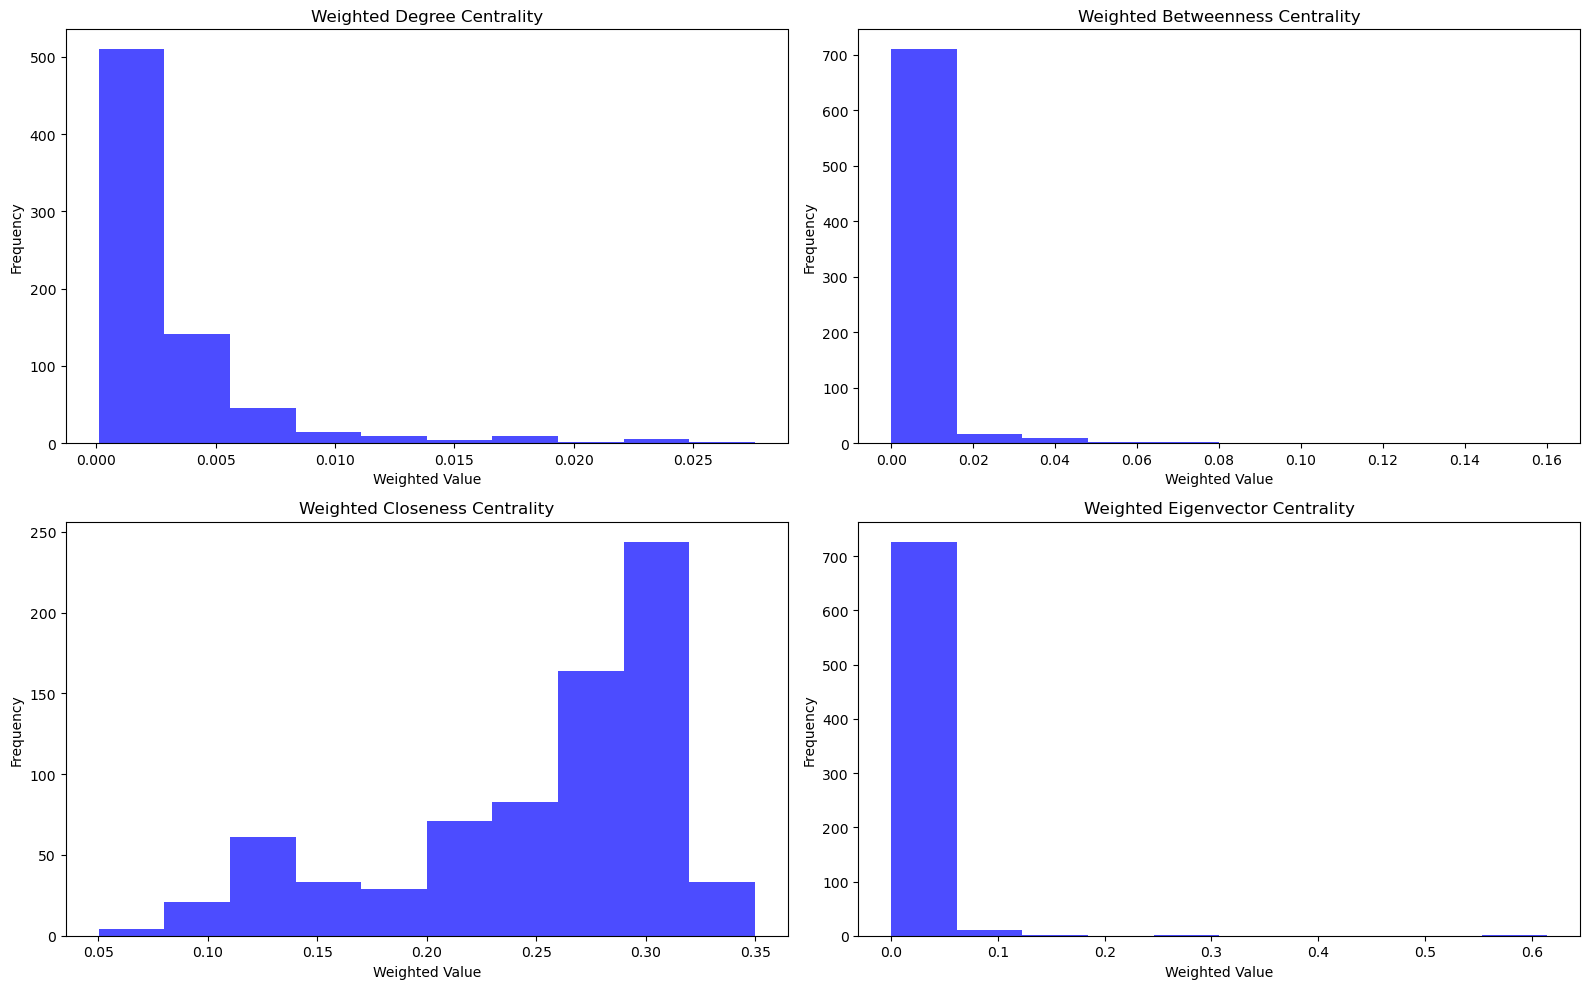

In [16]:
plt.figure(figsize=(16, 10))

for i, (title, values) in enumerate(weighted_centrality_measures.items(), 1):
    plt.subplot(2, 2, i)
    plt.hist(values, bins=10, alpha=0.7, color='blue')
    plt.title(title)
    plt.xlabel('Weighted Value')
    plt.ylabel('Frequency')


plt.tight_layout()
plt.show()

Comparison of Weighted Centrality Distributions

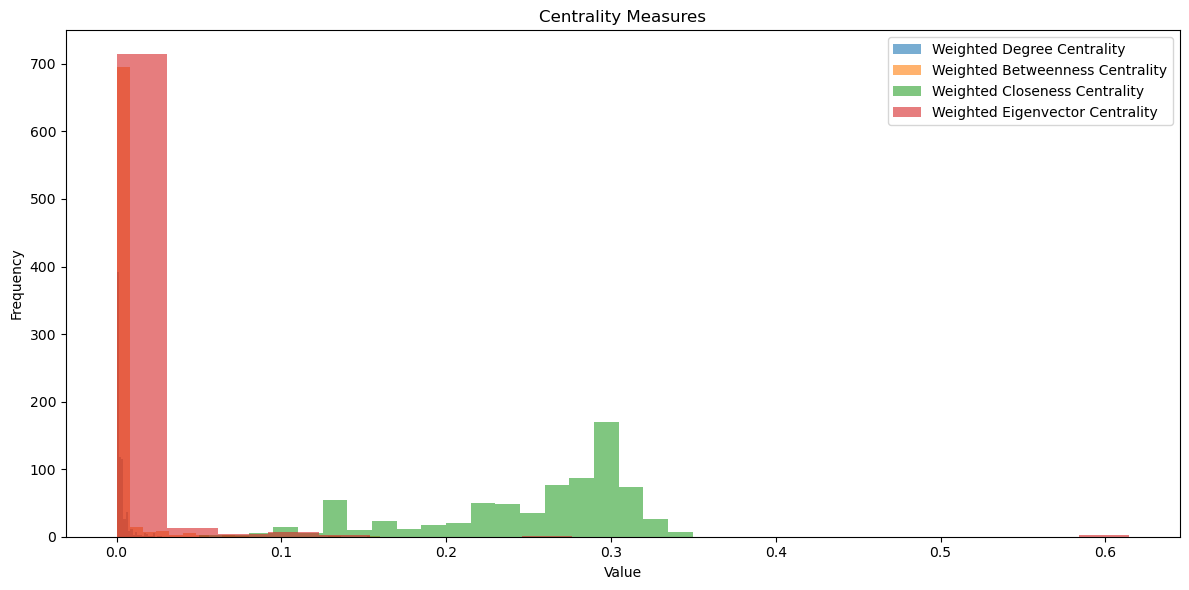

In [23]:
plt.figure(figsize=(12, 6))
for i, (title, values) in enumerate(weighted_centrality_measures.items(), 1):
    plt.hist(values, bins=20, alpha=0.6, label=title)

plt.title('Centrality Measures')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

## Top Centrality Artists

Since the weighted centralities distributions are significantly more skewed compared to the unweighted distributions, we will continue with the unweighted centralities for analysis. 

In [61]:
#Get the top ten centralities from the dictionaries defined above

top_10_degree = dict(sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10])
top_10_betweenness = dict(sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10])
top_10_closeness = dict(sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10])
top_10_eigenvector = dict(sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:10])
top_10_cluster= dict(sorted(nx.clustering(g).items(), key=lambda x: x[1], reverse=True)[:10])

### Degree
Artists with high degree imply that they are universally popular, which causes them to appear on multiple playlists with various types of artists. This also implies that their music is varied and can appear in different musical communities.

In [29]:
top_10_degree

{'Backstreet Boys': 0.31536388140161725,
 'Eminem': 0.30188679245283023,
 'Lynyrd Skynyrd': 0.28706199460916443,
 'ASAP Rocky': 0.2830188679245283,
 'Ed Sheeran': 0.2830188679245283,
 'Justin Timberlake': 0.2722371967654987,
 'Eagles': 0.2533692722371968,
 'Drake': 0.25202156334231807,
 'Major Lazer': 0.24393530997304583,
 'Maroon 5': 0.24258760107816713}

### Betweenness 
Artists with high betweenness imply that they are popular artists that act as an intermediary between two separate music communities. They are gateway artists for people from one community to transition to another. 

In [28]:
top_10_betweenness

{'John Williams': 0.1351419186573109,
 'The Beatles': 0.09512410750450115,
 'Backstreet Boys': 0.07329286079229053,
 'Eminem': 0.07140554572262447,
 'Ed Sheeran': 0.07016144991339097,
 'Ellie Goulding': 0.06269588636578761,
 'Eagles': 0.049367962516403,
 'Lynyrd Skynyrd': 0.04899014097436101,
 'Maroon 5': 0.03730869822079892,
 'ASAP Rocky': 0.034648507565513645}

### Closeness
Artists with high closeness imply that they are popular artists for musical discovery and exploration. These artists are close to every other playlist, allowing for a wide range of selection for people to browse.

In [30]:
top_10_closeness

{'Eminem': 0.5595776772247361,
 'Backstreet Boys': 0.5541448842419716,
 'Ed Sheeran': 0.5504451038575667,
 'Lynyrd Skynyrd': 0.5455882352941176,
 'Eagles': 0.5412107950401167,
 'Major Lazer': 0.5384615384615384,
 'The Beach Boys': 0.5361271676300579,
 'Coldplay': 0.5341972642188625,
 'OutKast': 0.529621698786581,
 'The Weeknd': 0.5243816254416961}

### Eigenvector
Artists with high eigenvector imply that they are similar to other popular artists. These artists tend to have high popularity have appearing together with other top-charting artists in playlists.

In [31]:
top_10_eigenvector

{'Backstreet Boys': 0.10064088418110204,
 'Lynyrd Skynyrd': 0.10029556030993582,
 'Justin Timberlake': 0.09979145853546736,
 'Ed Sheeran': 0.09878715263184223,
 'Jason Mraz': 0.0968105880651561,
 'One Direction': 0.09681010681694847,
 'John Legend': 0.09673475796492538,
 'MC Hammer': 0.09668498611701838,
 'Jake Owen': 0.09609925433475602,
 'Tim McGraw': 0.09609925433475602}

### Clustering Coefficient
Very tight-knit community with other artists that appear in the same playlists. The average is 0.923. This tells us that all the artists invovolved tend to be in really tight-knit communtities. Only a few artists have lower clustering coefficients that act as bridges between communities

In [38]:
top_10_cluster

{'AC/DC': 1.0,
 "Guns N' Roses": 1.0,
 'Disturbed': 1.0,
 'Van Halen': 1.0,
 'Queen': 1.0,
 'Beastie Boys': 1.0,
 'Aerosmith': 1.0,
 'Poison': 1.0,
 'Mötley Crüe': 1.0,
 'Twisted Sister': 1.0}

## Community Detection

### Girvan Newman

In [ ]:
import itertools
result = nx.algorithms.community.girvan_newman(g)
for k in range(0,6):

  communities = next(itertools.islice(result, k, None)) #keeps slicing the girvan_newman result at level k, the last parameter doesn't matter, leave it at None.

  print("Iteration ", k, ": # of communities: ", len(communities), ", modularity score: ", nx.algorithms.community.modularity(g, communities))
  print(communities)

Iteration  0 : # of communities:  2 , modularity score:  0.05362519393765885
({'Ellie Goulding', 'Nicky Jam', 'Grizzly Bear', 'Imagine Dragons', 'Mark Chesnutt', 'Ugly God', 'Redbone', 'Gwyneth Paltrow', 'The Vamps', 'Confederate Railroad', 'Melanie Martinez', 'Don Henley', 'Hozier', 'BØRNS', 'Vampire Weekend', 'Lloyd Price', 'Mary J. Blige', 'Charlie Puth', 'Chris Young', 'Twisted Sister', 'Demi Lovato', 'FritS', 'Neil Diamond', 'OneRepublic', 'Fleurie', 'Vance Joy', 'The Marvelettes', 'Kehlani', 'The Raconteurs', 'Rose Royce', 'Aerosmith', 'Bahamas', 'Hank Williams, Jr.', 'Billy Idol', 'Mark Wills', 'Elvis Presley', 'Rupert Holmes', 'QUE.', 'Heatwave', 'The Wood Brothers', 'Jon Pardi', 'Alan Jackson', 'David Lee Murphy', "The Mowgli's", 'Daryl Hall & John Oates', 'Bon Jovi', 'Rusted Root', 'Isaiah Rashad', 'Chris Janson', 'Pentatonix', 'T-Pain', 'Kanye West', 'Willie Taylor', 'Marian Hill', 'Joe Diffie', 'Luis Fonsi', 'Dion', 'Family of the Year', 'Jackie Apostel', 'Aaron Lines', 'St

KeyboardInterrupt: 

Even after running for 10 minutes only got 1 iteration of GN done. 

### Louvain

Gephi uses Louvain for its community detection as well so we will stick with Louvain as well in the notebook. The 30testvisualization file has Louvain already ran and visualized. The # of communities and modularity score there vs the one in this notebook are slightly different due to the random nature of Louvain's starting point.

In [3]:
#Louvain Paramenters
weight = 'weight'
resolution = 1 # if greater than 1 favors smaller communities, if less than 1 favors larger communities
threshold = 0.0000001 # modularity gain threshold for each level. If gain is less than this threshold, the algorithm stops. default = 0.0000001
max_level = None # Max steps of the algorithm. If none, algorithm stops when threshold isn't reached. (Only used for default louvain_communities algorithm)
seed = 123 #random starting position of the initial communities. 

In [4]:
#Generator for each communities from each step of Louvain
#The last iteration is has the best modularity score
partitions = nx.algorithms.community.louvain_partitions(g,seed = seed, weight = weight, resolution = resolution, threshold = threshold)

parts = [] #list of partitions from each step.
for i, partition in enumerate(partitions):
    print(f"Partition at level {i}:")
    parts.append(partition)
    print(partition)

Partition at level 0:
[{'John Mellencamp', 'G. Point Allstars', 'Disturbed', 'Billy Joel', 'The Beatles', 'Kid Rock', 'Nirvana', 'Don McLean', 'The Monkees', 'Joan Jett', 'OutKast', 'The Who', 'Misfits', 'Mötley Crüe', 'Danzig', 'Foreigner', 'Kansas', 'Semisonic', 'Creedence Clearwater Revival', 'Rick Springfield', 'Run–D.M.C.', 'Elton John', "Guns N' Roses", 'Bryan Adams', 'Billy Idol', 'Eminem', 'The Beach Boys', 'Poison', 'Lynyrd Skynyrd', 'Various Artists', 'Cutting Crew', 'The Kinks', 'Aerosmith', 'Beastie Boys', 'The Rolling Stones', 'Blue Swede', 'Pearl Jam', 'Van Halen', 'Def Leppard', 'Tom Petty', 'Quiet Riot', 'Wu-Tang Clan', 'Ratt', 'Cheap Trick', 'Scorpions', 'Starship', 'Bon Jovi', 'Biz Markie', 'AC/DC', 'Phil Collins', 'Major Lazer', 'Van Morrison', 'Eurythmics', 'Simon & Garfunkel', 'Twisted Sister', 'Queen', 'Alice Cooper', 'America', 'The Charlie Daniels Band'}, {'The Presidents Of The United States Of America', 'Grouplove', 'U2', 'The Raconteurs', 'James Taylor', 'Don

In [5]:
%matplotlib inline

Helper functions from Activity2 to help graph Louvain Communities with NetworkX

In [6]:
def set_node_community(G, communities):
    '''Add community to node attributes'''
    for c, v_c in enumerate(communities):
        for v in v_c:
            # Add 1 to save 0 for external edges
            G.nodes[v]['community'] = c + 1

def set_edge_community(G):
    '''Find internal edges and add their community to their attributes'''
    for v, w, in G.edges:
        if G.nodes[v]['community'] == G.nodes[w]['community']:
            # Internal edge, mark with community
            G.edges[v, w]['community'] = G.nodes[v]['community']
        else:
            # External edge, mark as 0
            G.edges[v, w]['community'] = 0

def get_color(i, r_off=1, g_off=1, b_off=1):
    r0, g0, b0 = 0, 0, 0
    n = 16
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)
    g = low + span * (((i + g_off) * 5) % n) / (n - 1)
    b = low + span * (((i + b_off) * 7) % n) / (n - 1)
    return (r, g, b)

### Louvain Partition at First Step

In [7]:
set_node_community(g, parts[0])
set_edge_community(g)

# Set community color for nodes
node_color = [get_color(g.nodes[v]['community']) for v in g.nodes]

# Set community color for internal edges
external = [(v, w) for v, w in g.edges if g.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in g.edges if g.edges[v, w]['community'] > 0]
internal_color = [get_color(g.edges[e]['community']) for e in internal]

In [8]:
print("# of communities: ", len(parts[0]), ", modularity score: ", nx.algorithms.community.modularity(g, parts[0]))

# of communities:  23 , modularity score:  0.6868545445520104


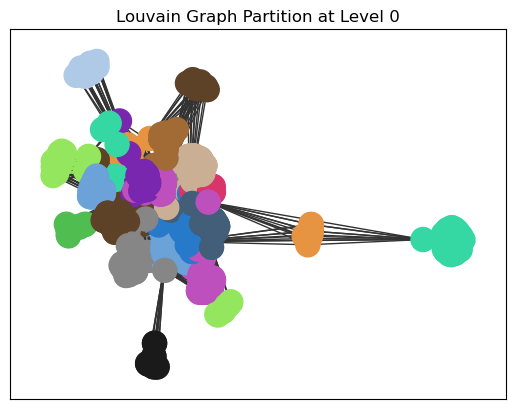

In [9]:
karate_pos = nx.spring_layout(g)
# Draw external edges
nx.draw_networkx(
    g,
    pos=karate_pos,
    node_size=0,
    edgelist=external,
    edge_color="#333333",
    with_labels=False )
# Draw nodes and internal edges
nx.draw_networkx(
    g,
    pos=karate_pos,
    node_color=node_color,
    edgelist=internal,
    edge_color=internal_color,
    with_labels=False )

plt.title(f"Louvain Graph Partition at Level {0}")
plt.show()

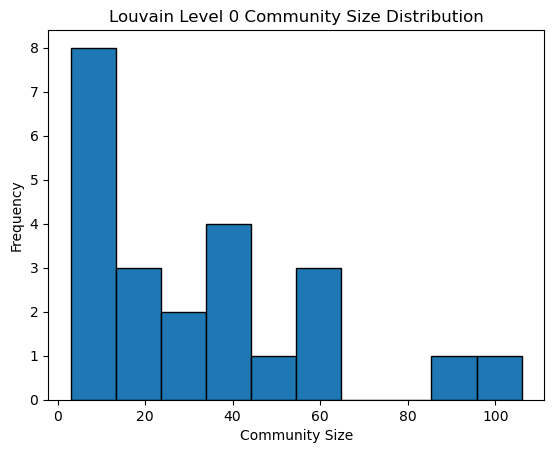

In [19]:
from collections import Counter
community_sizes = [len(community) for community in parts[0]]

size_counts = Counter(community_sizes)

# Plot the histogram
plt.hist(community_sizes, bins=10, edgecolor='black')
plt.xlabel('Community Size')
plt.ylabel('Frequency')
plt.title('Louvain Level 0 Community Size Distribution')
plt.show()

### Louvain Partition at Second Step (Max Modularity)

In [10]:
set_node_community(g, parts[1])
set_edge_community(g)

# Set community color for nodes
node_color = [get_color(g.nodes[v]['community']) for v in g.nodes]

# Set community color for internal edges
external = [(v, w) for v, w in g.edges if g.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in g.edges if g.edges[v, w]['community'] > 0]
internal_color = [get_color(g.edges[e]['community']) for e in internal]

In [11]:
print("# of communities: ", len(parts[1]), ", modularity score: ", nx.algorithms.community.modularity(g, parts[1]))

# of communities:  10 , modularity score:  0.7048695390169439


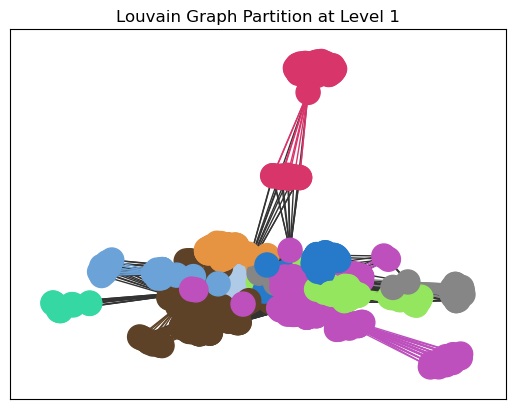

In [12]:
karate_pos = nx.spring_layout(g)
# Draw external edges
nx.draw_networkx(
    g,
    pos=karate_pos,
    node_size=0,
    edgelist=external,
    edge_color="#333333",
    with_labels=False )
# Draw nodes and internal edges
nx.draw_networkx(
    g,
    pos=karate_pos,
    node_color=node_color,
    edgelist=internal,
    edge_color=internal_color,
    with_labels=False )

plt.title(f"Louvain Graph Partition at Level {1}")
plt.show()

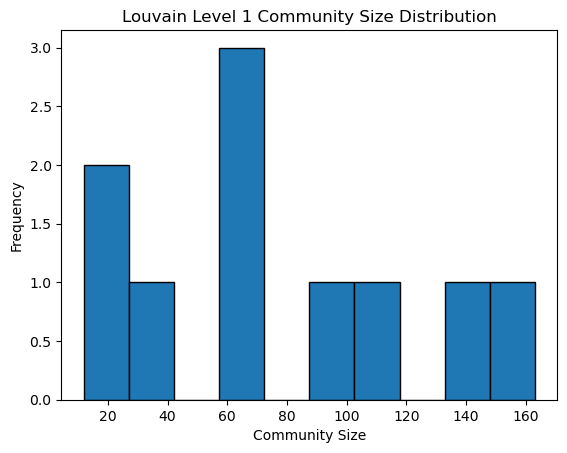

In [20]:
from collections import Counter
community_sizes = [len(community) for community in parts[1]]

size_counts = Counter(community_sizes)

# Plot the histogram
plt.hist(community_sizes, bins=10, edgecolor='black')
plt.xlabel('Community Size')
plt.ylabel('Frequency')
plt.title('Louvain Level 1 Community Size Distribution')
plt.show()

The initial louvain division has more niche artist communities that appear. As the phases increase, the more generalized the communities become

## Link Prediction

### Using Jaccard Similarity

Jaccard Similarity is the ratio of the common neighbors between two nodes over the total neighbors they have. That value will then be compared to a threshold to determine if an edge between the two nodes will form. In this context, it will predict if two artists who don't share any playlists will eventually be on the same playlist, given how many common artists they co-occur with.

In [72]:
#sample sizes to remove from original graph, Larger sample means more is removed, and less is used to predict. 
sample_size_s = 0.10
sample_size_e = 0.25 
sample_size_step = 0.05

Remove the various number of edges from the original graph to use for prediction

In [61]:
#Code used from Activity 5
import random
train_sets = {} #dictionary where each set has different sample sizes
for k in np.arange (sample_size_s,sample_size_e + sample_size_step, sample_size_step):
    edge_subset = random.sample(list(g.edges()), int(k * g.number_of_edges()))
    g_train = g.copy()
    g_train.remove_edges_from(edge_subset)
    train_sets[k] = g_train

Make link prediction based on different thresholds for each sample size.

In [66]:
start = 0.1 #Threshold start
end = 0.8 #Threshold end
step = 0.05

In [67]:
prediction_sets = {} #key is the sample size, value is the prediction scores based on thresholds
for size,t in train_sets.items():
  prediction_jaccard = nx.jaccard_coefficient(t, edge_subset)
  score, label = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in prediction_jaccard])
  predictions = {} # dictionary of threshold value vs prediction score

  for k in np.arange (start,end+step, step):
    predicted_edges = 0
    for s in score:
      if s > k:
        predicted_edges += 1

    predicted = predicted_edges / len(edge_subset)
    predictions[k] = predicted
    prediction_series = pd.Series(predictions)
  prediction_sets[size] = prediction_series

In [68]:
prediction_sets

{0.1: 0.10    0.993704
 0.15    0.978050
 0.20    0.948273
 0.25    0.901480
 0.30    0.854518
 0.35    0.802110
 0.40    0.745278
 0.45    0.692020
 0.50    0.647269
 0.55    0.618343
 0.60    0.590437
 0.65    0.562872
 0.70    0.515909
 0.75    0.407521
 0.80    0.213714
 0.85    0.049515
 dtype: float64,
 0.15000000000000002: 0.10    0.991833
 0.15    0.971074
 0.20    0.931257
 0.25    0.878509
 0.30    0.823890
 0.35    0.768079
 0.40    0.700527
 0.45    0.653905
 0.50    0.614259
 0.55    0.587375
 0.60    0.546878
 0.65    0.479326
 0.70    0.341331
 0.75    0.143270
 0.80    0.027905
 0.85    0.003743
 dtype: float64,
 0.20000000000000004: 0.10    0.988770
 0.15    0.962906
 0.20    0.920197
 0.25    0.856049
 0.30    0.797005
 0.35    0.728263
 0.40    0.663264
 0.45    0.625830
 0.50    0.585333
 0.55    0.537519
 0.60    0.431002
 0.65    0.256253
 0.70    0.089161
 0.75    0.018377
 0.80    0.003233
 0.85    0.000851
 dtype: float64,
 0.25000000000000006: 0.10    0.987919

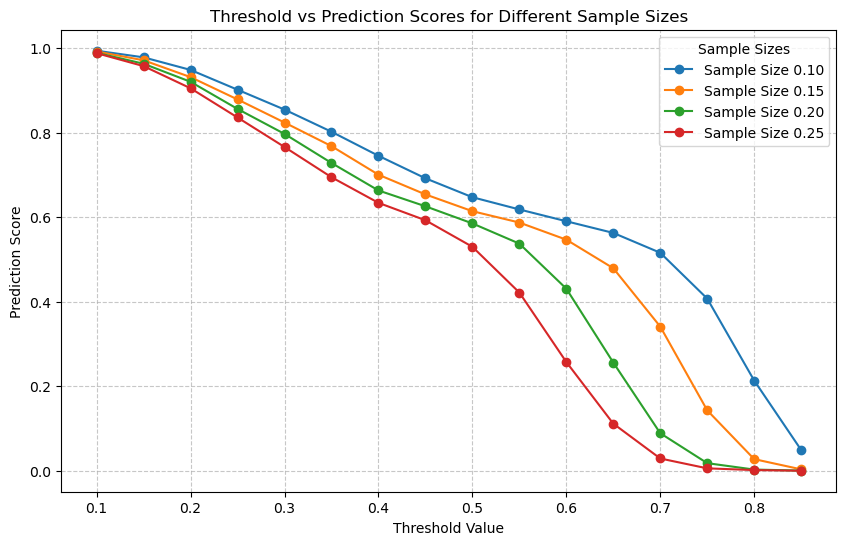

In [ ]:
plt.figure(figsize=(10, 6))
for size, series in prediction_sets.items():
    plt.plot(series.index, series.values, marker='o', label=f'Sample Size {size:.2f}')


plt.title('Threshold vs Prediction Scores for Different Sample Sizes')
plt.xlabel('Threshold Value')
plt.ylabel('Prediction Score')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title="Sample Sizes")


plt.show()